In [1]:
import os 
import string
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objects as go
import plotly.express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
df = pd.read_csv("startup_funding.csv")
df.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0", "").replace("\\\\xc2\\\\xa0", "")


for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [5]:
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'
df['Date'][df['Date']=='05/072018'] = '05/07/2018'

df["year"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

cnt_srs = df["year"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals over years",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [6]:
import datetime

df["yearmonth"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y").apply(lambda x: datetime.date(x.year, x.month, 1))

cnt_srs = df["yearmonth"].value_counts()
cnt_srs = cnt_srs.sort_index()
trace = go.Scatter(
    x = cnt_srs.index.astype(str),
    y = cnt_srs.values,
    marker = dict(
        color = "#1E90FF",
    ),
)

layout = go.Layout(
    title = go.layout.Title(
        text = "Number of funding deals - month on month",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 500,
)

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "funding")

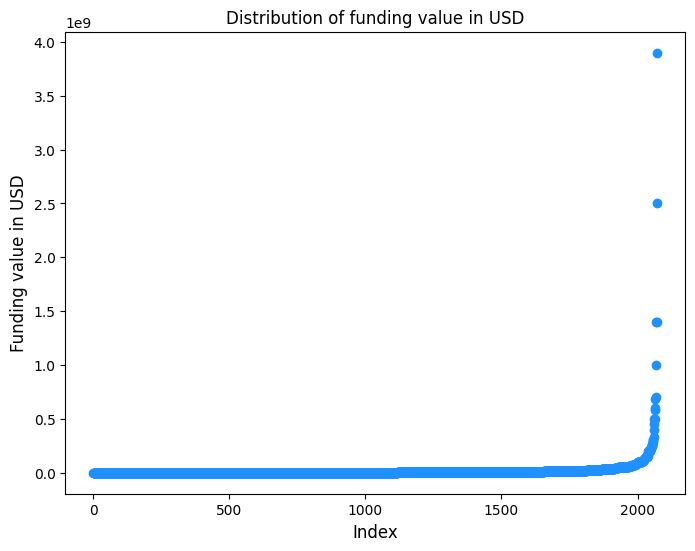

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def clean_amount(x):
    x = str(x).replace(",", "").replace("+", "").lower()
    x = x.replace("undisclosed", "").replace("n/a", "").replace("unknown", "")  # Handle "unknown"
    if x.strip() == '':
        return -999  # Return as a numeric value
    try:
        return float(x)
    except ValueError:
        return -999  # Handle unexpected non-numeric values

df["CleanedAmount"] = df["AmountInUSD"].apply(clean_amount)

# Filter out invalid values
AmountInUSD = df["CleanedAmount"]
AmountInUSD = AmountInUSD[AmountInUSD != -999]  # Remove placeholders

# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#1E90FF")
plt.xlabel('Index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()


In [11]:
df.iloc[df["CleanedAmount"].sort_values(ascending = False).index[:5]]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,90,00,00,000",nan,2019,2019-08-01,3.900000e+09
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",nan,2017,2017-08-01,2.500000e+09
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,40,00,00,000",nan,2017,2017-05-01,1.400000e+09
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",nan,2017,2017-03-01,1.400000e+09
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,00,00,00,000",nan,2019,2019-11-01,1.000000e+09


In [13]:
df["CleanedAmount"][df["CleanedAmount"] == 3900000000] = 50000000

cnt_df = df.groupby("year")["CleanedAmount"].agg(["sum", "mean"])
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x = cnt_srs.index,
    y = cnt_srs.values,
    marker = dict(
        color = "#1E90FF",
    ),
)

layout = go.Layout(
    title = go.layout.Title(
        text = "Sum of funding value in each year",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 500,
)

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.plot(fig, filename = "funding")

/home/huppdev28/.local/lib/python3.8/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `funding` didn't end with .html. Adding .html to the end of your file.



'funding.html'

In [14]:
import re
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df['InvestmentType'] = df['InvestmentType'].apply(lambda x: remove_punctuation(str(x)))

funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

for i, v in funding_map.items():
    df['InvestmentType'][df['InvestmentType']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [17]:
cnt_df = df.groupby("InvestmentType")["CleanedAmount"].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending = False)
dnt_df = cnt_df.iloc[:10, :]
cnt_srs = cnt_df["sum"]
snt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title = go.layout.Title(
        text = "Sum of investment amount by Investment Type",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data = data, layout = layout)
py.plot(fig, filename = "funding")

/home/huppdev28/.local/lib/python3.8/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `funding` didn't end with .html. Adding .html to the end of your file.



'funding.html'

In [18]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Mean Investment amount by Funding Round",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [20]:
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
        "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}
for i, v in location_map.items():
    df['City'][df['City']==i] = v 

def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = df['City'].value_counts()[:14]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals in each location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")


In [22]:
cnt_df = df.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:14,:]

cnt_srs = cnt_df['sum']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Total funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [24]:
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_values(ascending = False)
layout = go.Layout(
    title = go.layout.Title(
        text = "Mean funding value by Location",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "funding")

In [25]:
temp_df = df.groupby(["City", "year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
temp_df = temp_df[temp_df["City"].isin(cities_to_use)]
temp_df.columns = ["City", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x = "Year", y = "City", color = "City", size = "Count")
layout = go.Layout(
    title = go.layout.Title(
        text = "Number of funding deals by location over time",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 800,
    showlegend = False
)

fig.update_layout(layout)
fig.show()

In [27]:
fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [33]:
location_map = {
    "eCommerce": "E-Commerce",
    "ECommerce": "E-Commerce"
}
for i, v in location_map.items():
    df["IndustryVertical"][df["IndustryVertical"] == i] = v

cnt_srs = df["IndustryVertical"].value_counts()[:10]
layout = go.Layout(
    title = go.layout.Title(
        text = "Number of funding deals by Industry Vertical",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "funding")

In [34]:
temp_df = df.groupby(["IndustryVertical", "year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
temp_df = temp_df[temp_df["year"] != 2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [35]:
fig = px.scatter(temp_df, x = "Year", y = "IndustryVertical", color = "IndustryVertical", size = "Mean")
layout = go.Layout(
    title = go.layout.Title(
        text = "Mean funding value by industry over time",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 600,
    height = 600,
    showlegend = False
)
fig.update_layout(layout)
fig.show()

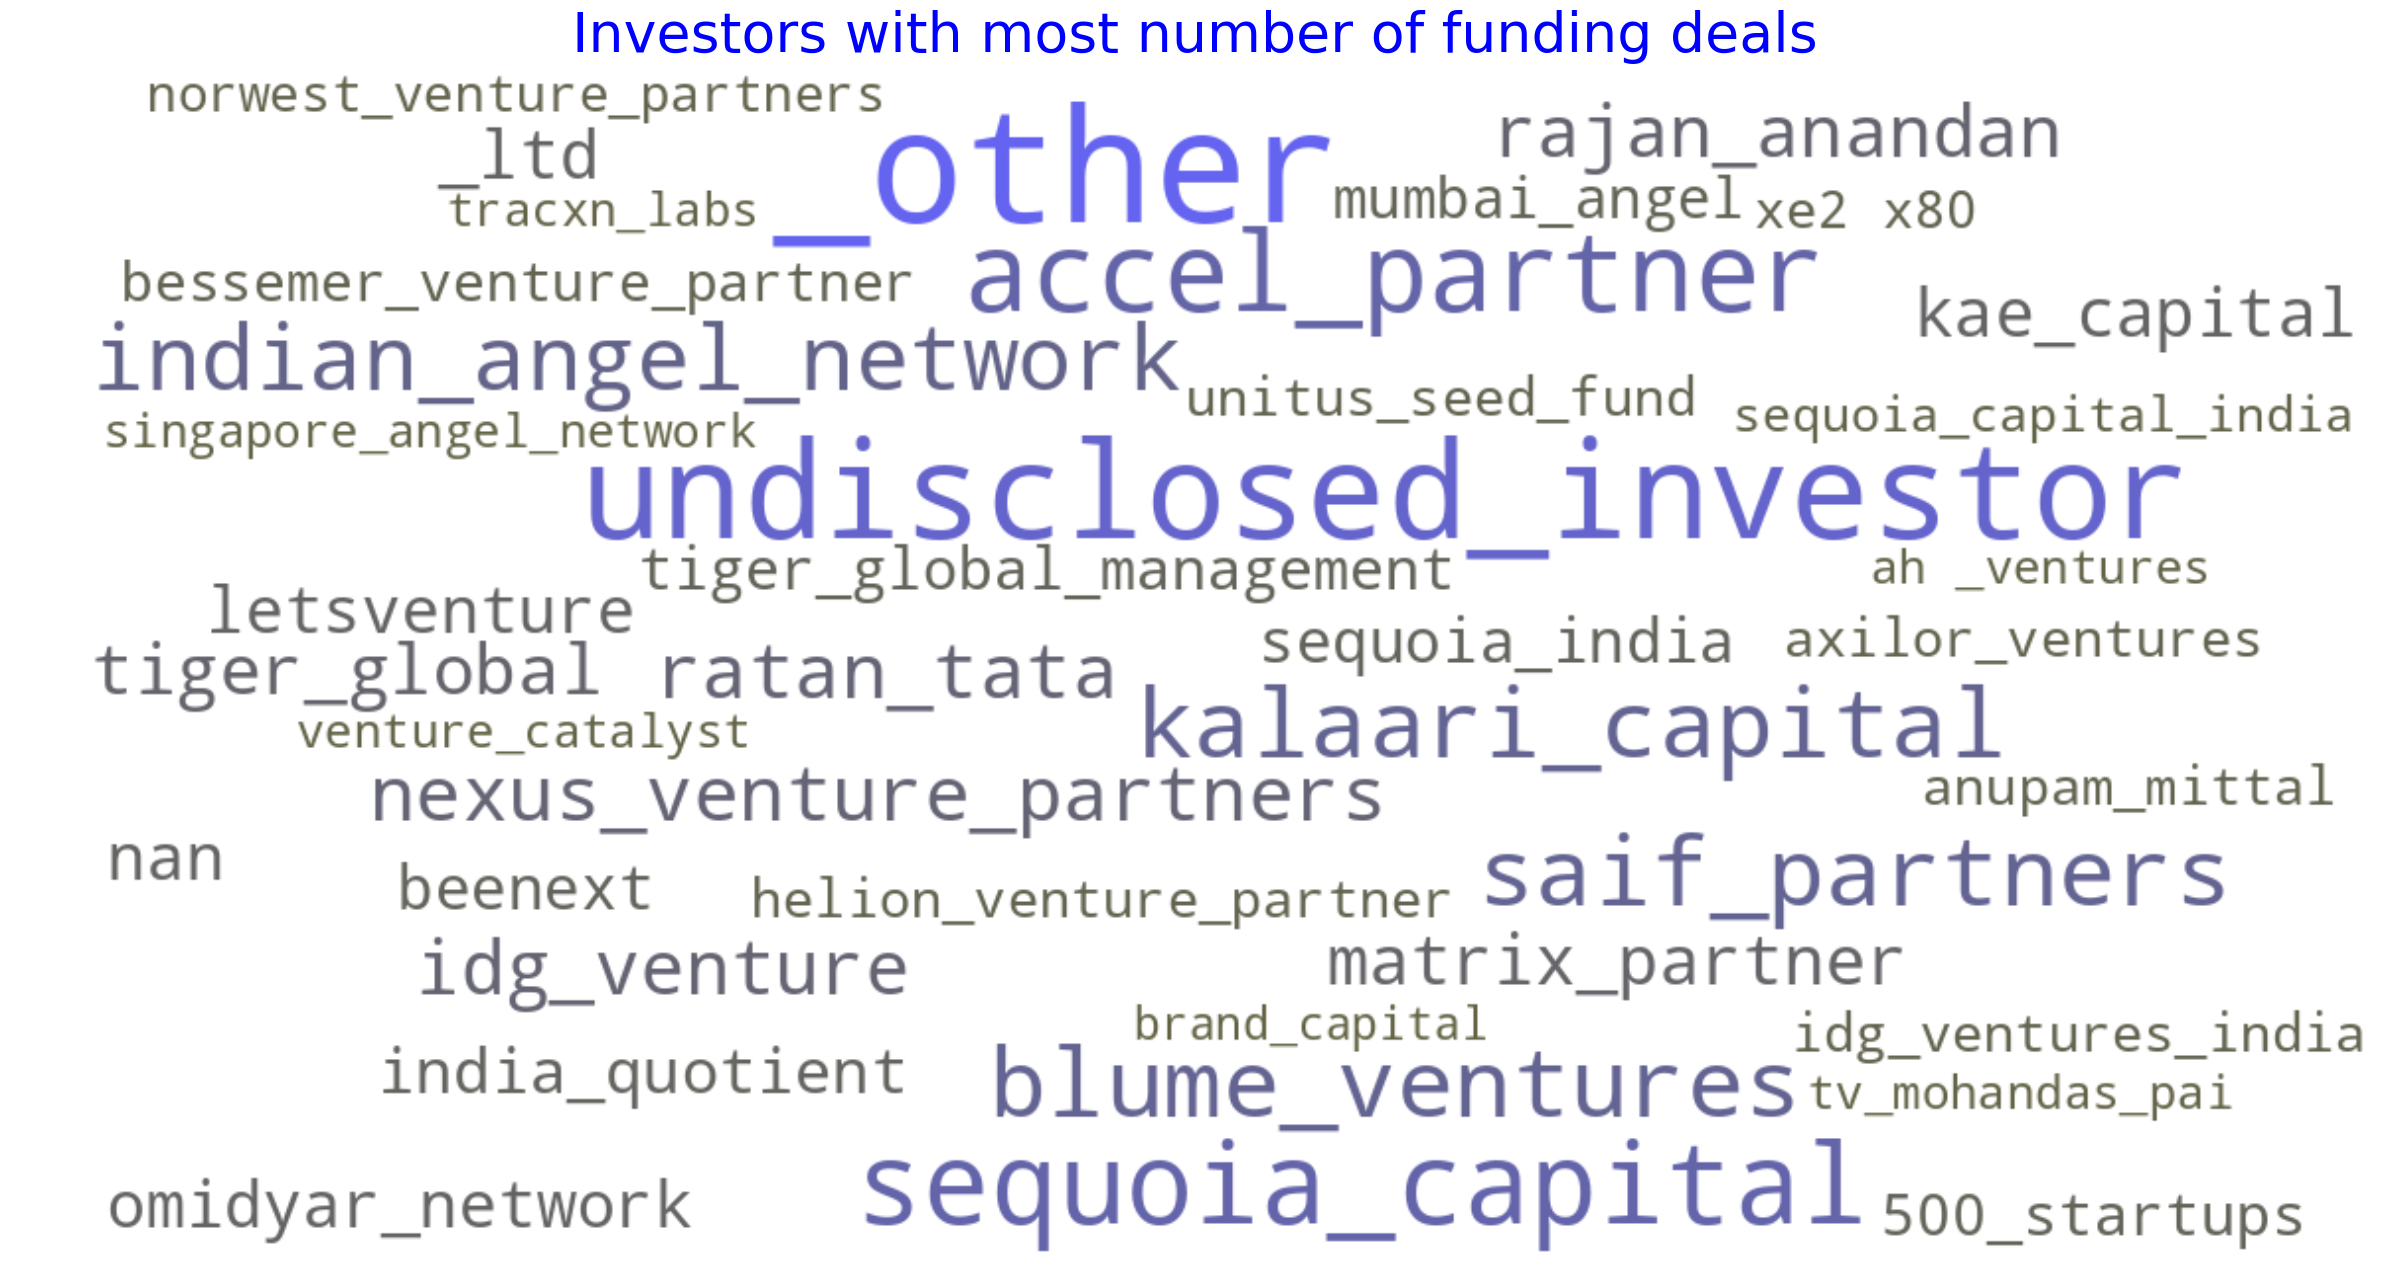

In [36]:
from wordcloud import WordCloud, STOPWORDS
import random
random.seed(123)

inv_names = []
for invs in df['InvestorsName']:
    for inv in str(invs).split(","):
        if inv != "":
            inv_names.append(inv.strip().lower().replace(" ","_").replace("'",""))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    #return "hsl(0, 0%%, %d%%)" % (font_size*3)
    return (100, 100, font_size*3)

def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=grey_color_func):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=1200, 
                    height=600,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size, 'color': 'blue',
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'blue', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(' '.join(inv_names), title="Investors with most number of funding deals")

In [38]:
cnt_srs = pd.Series(inv_names).value_counts()[:10]
layout = go.Layout(
    title = go.layout.Title(
        text = "Number of funding deals by Investor Name",
        x = 0.5
    ),
    font = dict(size = 14),
    width = 800,
    height = 600,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = "funding")

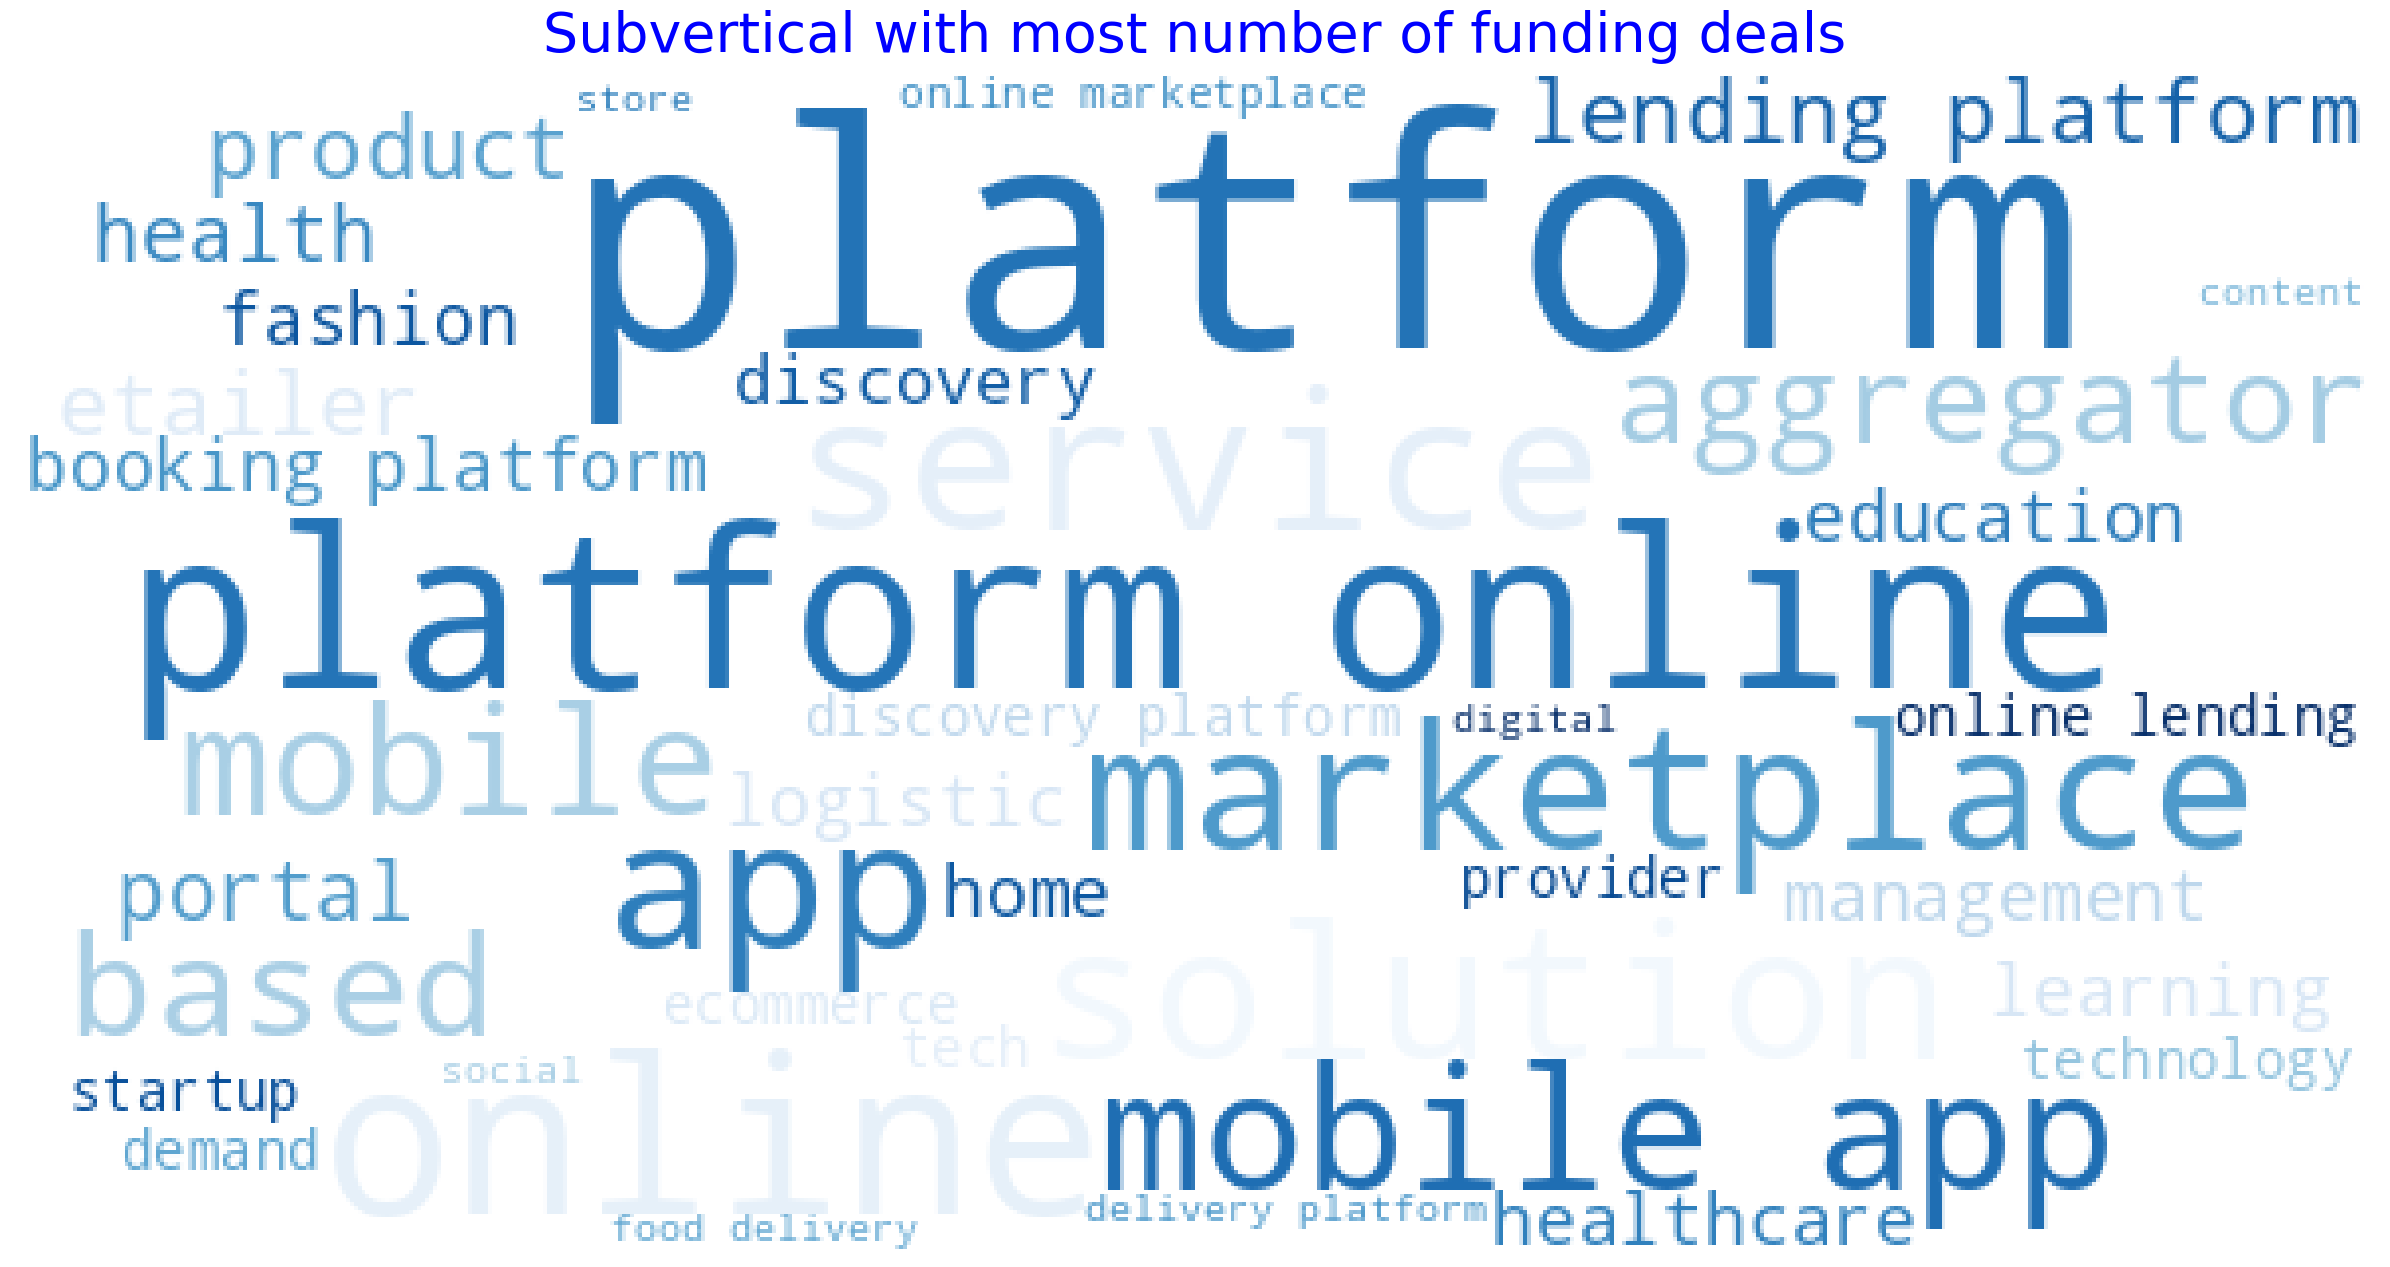

In [41]:
inv_names = []
for invs in df['SubVertical']:
    for inv in str(invs).split():
        if inv != "":
            inv_names.append(inv.strip().lower().replace("'",""))
            
def plot_wordcloud(text, mask=None, max_words=40, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'nan', ' nan'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    prefer_horizontal = 1.0,
                    max_font_size = max_font_size, 
                    min_font_size = 10,
                    random_state = 42,
                    #color_func = lambda *args, **kwargs: (140,0,0),
                    #color_func = color_map(),
                    colormap="Blues",
                    width=600, 
                    height=300,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_color), interpolation="bilinear");
        plt.title(title, fontdict={
            'size': title_size, 
            'color': 'blue',
            'verticalalignment': 'bottom'
        }
    )
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={
            'size': title_size, 
            'color': 'blue', 
            'verticalalignment': 'bottom'
        }
    )
    plt.axis('off');
    plt.tight_layout()  

plot_wordcloud(' '.join(inv_names), title="Subvertical with most number of funding deals")